# Data Visualization
In this section several examples for visualization are provided. 
First we will be using iris dataset.

Load iris dataset into a dataframe.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Show the possible values for species and the amount of values for each type.

In [2]:
print(df.species.unique())
df["species"].value_counts()

[0 1 2]


2    50
1    50
0    50
Name: species, dtype: int64

Show the columns' names of the dataframe 

In [3]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

## Histogram
The histogram is to visualize the shape of the distribution. In this case, we show the distribution for the variables that are in cm. We can see that the sepal width follows a normal distribution around 3. You can use the plot method from the dataframe to generate the graph, remember to keep the columns from interest. 

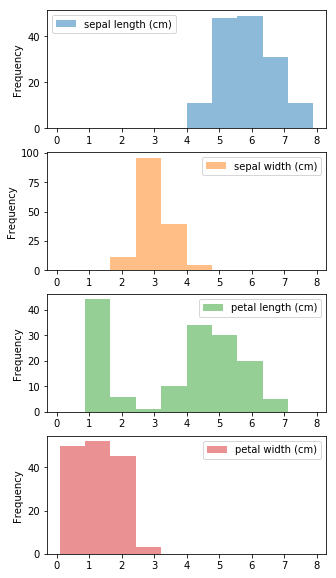

In [4]:
df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']].plot.hist(alpha=0.5, subplots=True, sharex=False, sharey=False, figsize=(5,10))
plt.show()

## Pie chart
A pie chart has a circular shape, which shows the numerical proportion for each value. Draw a pie chart to visualize the distribution of species.

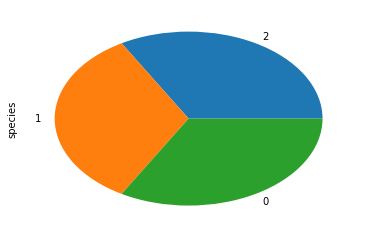

In [5]:
df.species.value_counts().plot.pie()
plt.show()

## Scatter plot
Scatter plots are for comparison between two variables. In this example, we compare the variables sepal lenght and petal lenght. We can see from the graph that there is a linear relationship between the variables. As the sepal lenght increases, the sepal lenght increases. You can use the plot.scatter method of the dataframe. 

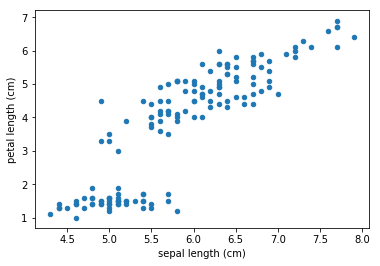

In [6]:
df.plot.scatter(x='sepal length (cm)', y='petal length (cm)')
plt.show()

### Color points by class
Coloring data points by the "species" column, we can see that the datapoints are grouped by each class. 

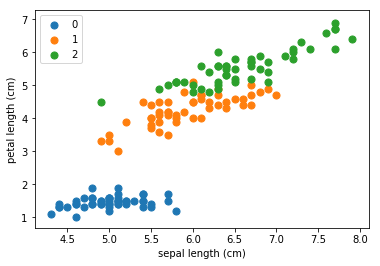

In [7]:
import numpy as np
def color_scatter_plot(ax, colcat, df, col1, col2):
    categories = np.unique(df[colcat].unique()) 
    for c in categories:
        df_aux = df[df[colcat]==c].copy()
        ax.scatter(df_aux[col1], df_aux[col2], label=c, s=50)
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.legend()
    return ax
fig, ax = plt.subplots()
ax = color_scatter_plot(ax=ax, colcat='species', df=df, col1='sepal length (cm)', col2='petal length (cm)')
plt.show()

Therefore, we can conclude that species labeled as "0", has small petal lenght and small sepal length. Species "1" are in the middle and species "2" have larger lenght. 

## Scatterplot matrix
Scatterplot matrix: It is a square and symetric grid of several scatterplots. It has rows and columns, each one corresponding to a variable. Each quadrant shows a scatterplot for variables x and y of the grid. For the diagonal cells it shows the distribution of the variable. You can use 

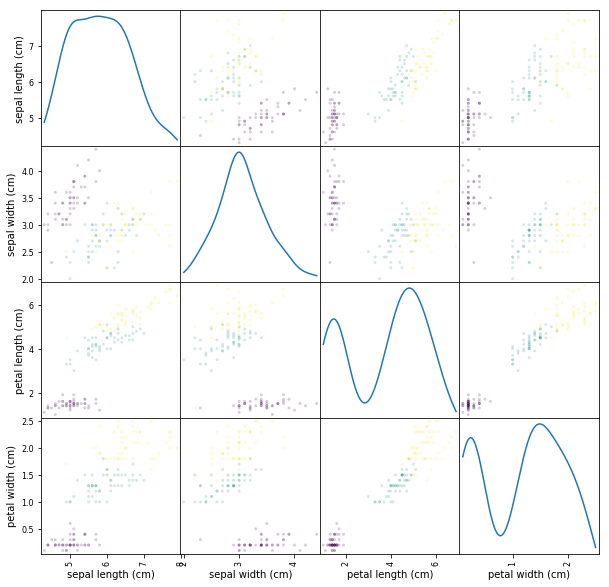

In [8]:
pd.plotting.scatter_matrix(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']], figsize  = [10, 10], diagonal='kde', c=df.species, alpha=0.2)
plt.show()

## Correlation matrix
A correlation matrix shows the relationship between the variables by a table, where each cell (i,j) corresponds to the value of the correlation between the variables i and j. The correlation is a value between -1 and 1 that represents the relationship between the variables. 
The graph of the example is a heatmap, which is a graphical representation of the correlation matrix, where the values of the correlation are represented with colors.   
    
Show the correlation matrix for the dataframe. 

In [9]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


Show the correlation matrix by a heatmap using seaborn library.

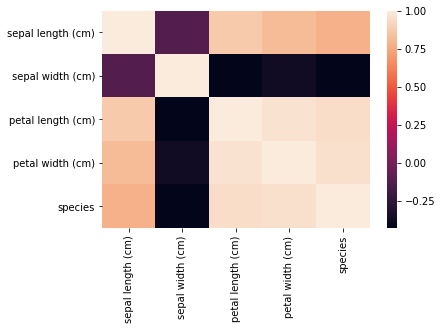

In [10]:
import seaborn as sn
sn.heatmap(df.corr(), annot=False)
plt.show()

## Boxplot

A boxplot is a graphical representation of the distribution of the data based on its quartiles. The quartiles divide the data into four equal parts.   

   
Generate a boxplot for the columns lenght for the sepal, and with and length for petal. 


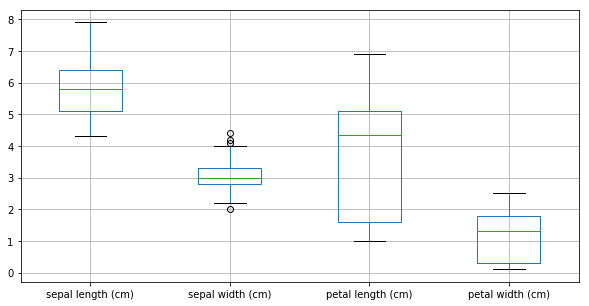

In [11]:
df.boxplot(column=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], figsize  = [10, 5])
plt.show()

## Outlier detection

Plot and analyze the boxplot for sepal witdh groupping by species column. Can you see any outliers? 

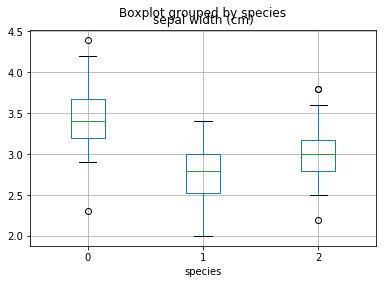

In [12]:
a = df.boxplot(column='sepal width (cm)', by='species')
plt.show()

If we analyze the boxplot for sepal with, we can see that there are some outliers when it is larger than 4, and there is one outlier when it is around 2. Show 3 different graphs to color the outliers into a scatter plot for these 3 combination of variables: 
- col1='sepal width (cm)', col2='sepal length (cm)'
- col1='sepal width (cm)', col2='petal length (cm)'
- col1='sepal width (cm)', col2='petal width (cm)'

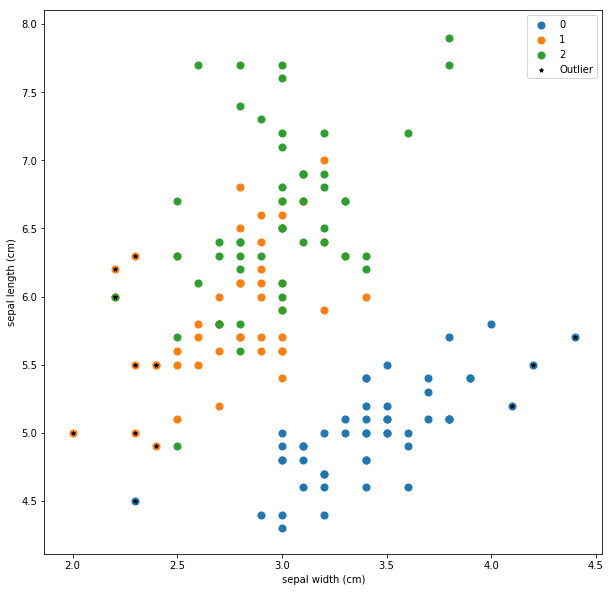

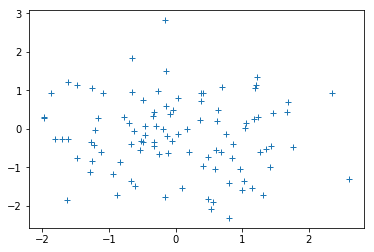

In [13]:
df_aux = df.copy()
df_aux['outlier'] = df_aux['sepal width (cm)'].apply(lambda x: 1 if (x > 4 or x<2.5) else 0)
df_aux = df_aux[df_aux['outlier']==1]

def color_dots_condition(ax, col, value, df, col1, col2, label):
    df_aux = df[df[col]==value].copy()
    ax.scatter(df_aux[col1], df_aux[col2], label=label, c='black', s=15, marker='*')
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.legend()
    return ax

axs = []
fig, ax1 = plt.subplots(1, 1, figsize=(10,10), sharex=True, sharey=True)

ax1 = color_scatter_plot(ax=ax1, colcat='species', df=df, col1='sepal width (cm)', col2='sepal length (cm)')
ax1 = color_dots_condition(ax=ax1, col='outlier', value=1, df=df_aux, col1='sepal width (cm)', col2='sepal length (cm)', label='Outlier')
axs.append(ax1)

fig, ax2 = plt.subplots(1, 1, figsize=(10,10), sharex=True, sharey=True)
ax2 =color_scatter_plot(ax=ax2, colcat='species', df=df, col1='sepal width (cm)', col2='petal length (cm)')
color_dots_condition(ax=ax2, col='outlier', value=1, df=df_aux, col1='sepal width (cm)', col2='petal length (cm)', label='Outlier')
axs.append(ax2)

fig, ax3 = plt.subplots(1, 1, figsize=(10,10), sharex=True, sharey=True)
ax3 = color_dots_condition(ax=ax3, col='outlier', value=1, df=df_aux, col1='sepal width (cm)', col2='petal width (cm)', label='Outlier')
ax3 = color_scatter_plot(ax=ax3, colcat='species', df=df, col1='sepal width (cm)', col2='petal width (cm)')
axs.append(ax3)

%matplotlib inline


import matplotlib.pyplot as plt
import numpy as np

import ipywidgets
from IPython.display import display,clear_output

plt.ioff()
ax=plt.gca()
plt.plot(np.random.randn(100),np.random.randn(100),'+')

out=ipywidgets.Output()
button=ipywidgets.Button(description='Next')
vbox=ipywidgets.VBox(children=(out,button))
display(vbox)

index = 0
n = len(axs)
def click(b):
    global index
    global axs
    with out:
        ax = axs[index]
        clear_output(wait=True)
        display(ax.figure)
    index+=1
    if(index==n):
        index =0

button.on_click(click)
click(None)

If you want to play more with widgets, there are plenty of things that you can do! 
Check the following links:
    
    - https://ipython-books.github.io/33-mastering-widgets-in-the-jupyter-notebook/
    - https://ipywidgets.readthedocs.io/en/stable/user_guide.html